In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
import time
from basic_functions import *
from dataproc import *

from scipy import stats

def outliercheck(target):

    # 执行Shapiro-Wilk检验
    statistic, p_value = stats.shapiro(target)

    # 输出检验结果
    print("Shapiro-Wilk检验结果：")
    print(f"统计量：{statistic}")
    print(f"p值：{p_value}")
    if p_value < 0.05:
        print('Non-normal')
    else:
        print('Normal')

dataSet = LoadCatagory('312', dates).segment(3)
dataSet.segment(3)


Labelled data from device #312 on 20240101 successfully loaded.
1390 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]


Labelled data from device #312 on 20240102 successfully loaded.
1441 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]


Labelled data from device #312 on 20240103 successfully loaded.
1445 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]


Labelled data from device #312 on 20240106 successfully loaded.
1444 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]


Labelled data from device #312 on 20240107 successfully loaded.
1445 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]


Labelled data from device #312 on 20240119 successfully loaded.
1125 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]


Labelled data from device #312 on 20240329 su

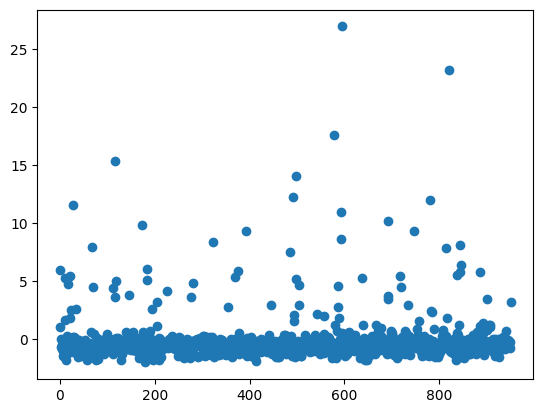

In [32]:
# labelling('20240419', '312', d312_20240419)

# DataVisualize('312', '20240329', 2)
i = 0
x = []
y = []
colors = []
for unit in dataSet.metro:
    x.append(i)
    y.append(unit.sd)
    i += 1
meanval = sum(y) / len(y)
vari = 0
for e in y:
    vari += abs(meanval - e)
vari /= len(y)
# upperbound = meanval + 3 * vari
# lowerbound = meanval - 3 * vari
# for e in y:
#     if e > upperbound or e < lowerbound:
#         colors.append('red')
#     else:
#         colors.append('blue')
# plt.scatter(x, y, color=colors)
z = []
for e in y:
    z.append((e-meanval) / vari)
plt.scatter(x, z)


In [10]:
tar = []
for unit in dataSet.bus:
    tar.append(unit.min)
outliercheck([1,2,2,3,3,3,2,2,1])

Shapiro-Wilk检验结果：
统计量：0.8379839284406623
p值：0.054845245259066755
Normal


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

# 创建数据集
X = [[x[4] - x[3]] for x in d]

# 使用 KMeans 进行聚类
kmeans = KMeans(n_clusters=1)
kmeans.fit(X)

# 计算每个样本到最近聚类中心的距离
distances = pairwise_distances_argmin_min(X, kmeans.cluster_centers_)[1]

# 设置离群值的阈值（例如，距离的百分位数）
threshold = 20

# 标记离群值
outliers = [X[i] for i, distance in enumerate(distances) if distance > threshold]

print("离群值：", outliers)

NameError: name 'd' is not defined

In [ ]:
import numpy as np

def kalman_filter(measurements, initial_mean, initial_covariance, process_noise, measurement_noise):
    # 初始化状态向量和协方差矩阵
    mean = initial_mean
    covariance = initial_covariance

    filtered_means = []
    filtered_covariances = []

    for measurement in measurements:
        # 预测步骤
        predicted_mean = mean
        predicted_covariance = covariance + process_noise

        # 更新步骤
        measurement_residual = measurement - predicted_mean
        measurement_residual_covariance = predicted_covariance + measurement_noise
        kalman_gain = predicted_covariance / measurement_residual_covariance
        mean = predicted_mean + kalman_gain * measurement_residual
        covariance = (1 - kalman_gain) * predicted_covariance

        filtered_means.append(mean)
        filtered_covariances.append(covariance)

    return filtered_means, filtered_covariances

# 测试示例
measurements = [1.2, 1.7, 2.4, 2.8]  # 测量序列
initial_mean = 0  # 初始状态均值
initial_covariance = 1  # 初始状态协方差
process_noise = 0.1  # 过程噪声方差
measurement_noise = 0.2  # 测量噪声方差

filtered_means, filtered_covariances = kalman_filter(measurements, initial_mean, initial_covariance, process_noise, measurement_noise)

# 打印输出结果
for mean, covariance in zip(filtered_means, filtered_covariances):
    print(f"Mean: {mean}, Covariance: {covariance}")

Mean: 1.0153846153846153, Covariance: 0.16923076923076924
Mean: 1.4081967213114752, Covariance: 0.11475409836065577
Mean: 1.9217391304347826, Covariance: 0.10355731225296445
Mean: 2.3647404505386875, Covariance: 0.10088148873653283


In [ ]:
from collections import Counter

def most_common_elements(lst):
    counter = Counter(lst)
    most_common = counter.most_common(1)
    return most_common[0][0] if most_common else None

# 示例列表
my_list = [1, 2, 3, 2, 4, 5, 2, 4, 2]

# 返回重复次数最高的元素
result = most_common_elements(my_list)

print(result)  # 输出: 2